In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9835


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.04, 0.96],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.31, 0.69]])

In [9]:
## Apply Logistic Regression 

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [10]:
# Applying Adaboost

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [11]:
# Applying KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [12]:
# Now we will focus on selecting the best threshold for maximum accuracy¶

In [29]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))
print(pred)

Ensemble test roc-auc: 0.9852111111111111
[0      0.99
1      0.02
2      0.97
3      0.89
4      0.67
       ... 
595    0.02
596    0.02
597    0.99
598    0.01
599    1.00
Length: 600, dtype: float64, 0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64, 0      0.559186
1      0.463282
2      0.538202
3      0.509875
4      0.490344
         ...   
595    0.461121
596    0.441377
597    0.532403
598    0.441720
599    0.559890
Length: 600, dtype: float64, 0      1.0
1      0.0
2      0.8
3      0.8
4      0.4
      ... 
595    0.0
596    0.0
597    1.0
598    0.2
599    0.8
Length: 600, dtype: float64]


In [28]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.89,0.761539,0.509875,0.8
4,0.67,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.885262
1      0.120823
2      0.818783
3      0.740353
4      0.584947
         ...   
595    0.126340
596    0.115345
597    0.876697
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [16]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90406694, 0.90327475, 0.80665023,
       0.80662833, 0.78952438, 0.7880558 , 0.78630736, 0.78571156,
       0.75724465, 0.75537124, 0.71845844, 0.71637362, 0.71075746,
       0.70643711, 0.66037883, 0.65993537, 0.60744697, 0.60675354,
       0.59656376, 0.59114346, 0.5846569 , 0.57986186, 0.57896627,
       0.57550386, 0.54588469, 0.53719563, 0.53355932, 0.52377948,
       0.52365858, 0.48616892, 0.4446034 , 0.37905357, 0.37629719,
       0.34995613, 0.34836612, 0.23241816, 0.22890421, 0.2244954 ,
       0.22396893, 0.20995158, 0.20598417, 0.12053605, 0.1203351 ,
       0.10548439])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    #print(y_pred)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    #print(accuracy_ls)
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
32,0.444603,0.961667
31,0.486169,0.958333
29,0.523779,0.958333
27,0.537196,0.958333
26,0.545885,0.958333


In [18]:
accuracy_ls

,thresholds,accuracy
32,0.444603,0.961667
31,0.486169,0.958333
29,0.523779,0.958333
27,0.537196,0.958333
26,0.545885,0.958333
30,0.523659,0.956667
28,0.533559,0.956667
23,0.579862,0.953333
25,0.575504,0.953333
22,0.584657,0.951667


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

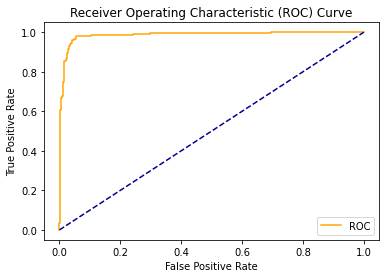

In [20]:
plot_roc_curve(fpr,tpr)